In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib
from itertools import groupby
from operator import itemgetter

import math

In [4]:
df = pd.read_csv('../../../../datos/grasp-mayor-grado-variando-iterations.csv', sep=', ', engine='python')

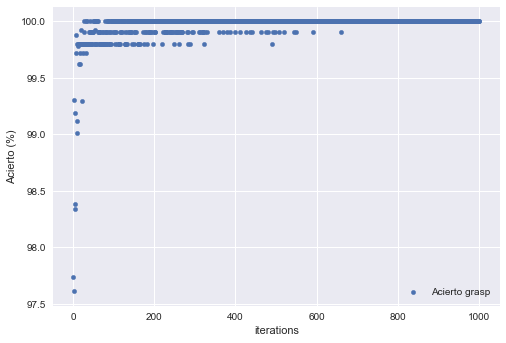

In [4]:
ax1 = df.plot(kind='scatter', x='iterations', y='promedioAcierto', grid=True, label="Acierto grasp")
plt.ylabel(r'Acierto (%)')

plt.savefig('../../../../pics/prom-acierto-grasp-mayor-grado-variando-iterations.png')
plt.show()

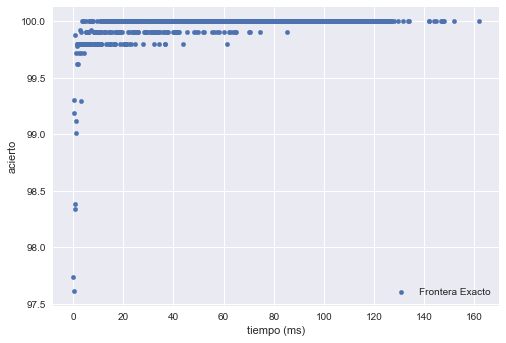

In [6]:
data1 = pd.DataFrame({
    'tiempo': df['tiempoTotal'].map(lambda x: x / 1000000.0),
    'acierto': df['promedioAcierto']
})


ax1 = data1.plot(kind='scatter', x='tiempo', y='acierto', grid=True, label="Frontera Exacto")

plt.savefig('../../../../pics/prom-acierto-vs-tiempo-grasp-mayor-grado-variando-iterations.png')

plt.xlabel('tiempo (ms)')
plt.show()

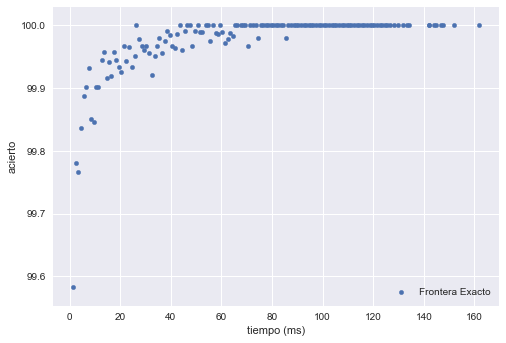

In [6]:
data2 = pd.DataFrame({
    'tiempo': df['tiempoTotal'],
    'acierto': df['promedioAcierto']
})

def remap(x):
    return math.floor(data2['tiempo'].loc[x] / 1000000.0)

data2 = data2.groupby(by=remap).mean()

data2['tiempo'] = data2['tiempo'].map(lambda x: x / 1000000.0)

data2 = data2.drop(data2.index[0])

plt.savefig('../../../../pics/prom-acierto-vs-tiempo-promediado-grasp-mayor-grado-variando-iterations.png')

ax1 = data2.plot(kind='scatter', x='tiempo', y='acierto', grid=True, label="Frontera Exacto")
plt.xlabel('tiempo (ms)')
plt.show()

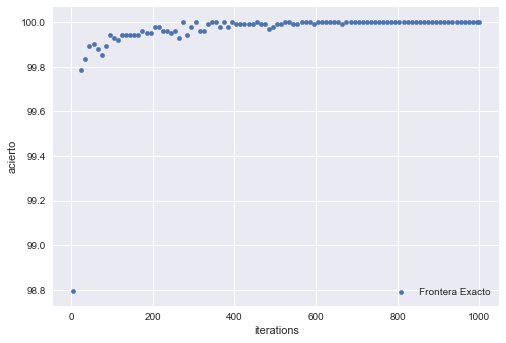

In [8]:
data3 = pd.DataFrame({
    'iterations': df['iterations'],
    'acierto': df['promedioAcierto']
})

def remap2(x):
    return math.floor(data3['iterations'].loc[x] / 10.0)

data3 = data3.groupby(by=remap2).mean()

data3 = data3.drop(data2.index[0])

plt.savefig('../../../../pics/prom-acierto-vs-iterations-promediado-grasp-mayor-grado-variando-iterations.png')

ax1 = data3.plot(kind='scatter', x='iterations', y='acierto', grid=True, label="Frontera Exacto")
plt.xlabel('iterations')
plt.show()

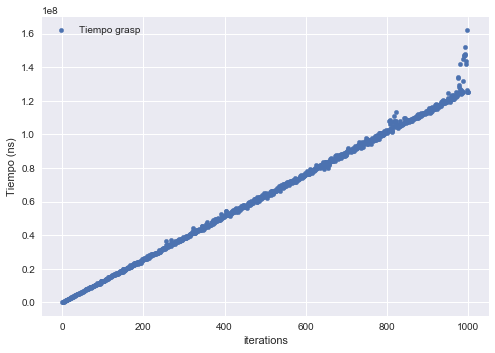

In [15]:
df = pd.read_csv('../../../../datos/grasp-mayor-grado-variando-iterations.csv', sep=', ', engine='python')

ax1 = df.plot(kind='scatter', x='iterations', y='tiempoTotal', grid=True, label="Tiempo grasp")
plt.ylabel(r'Tiempo (ns)')
# plt.ylim(0,150)
plt.savefig('../../../../pics/tiempos-grasp-mayor-grado-variando-iterations.png')
plt.show()

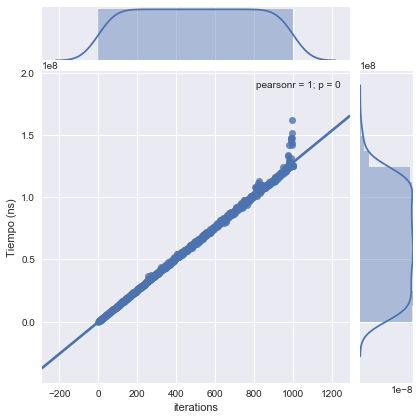

In [16]:
sns.jointplot(df['iterations'], df['tiempoTotal'], kind="reg")
# plt.xlabel(r'$nlog(n)$')
plt.ylabel(r'Tiempo (ns)')
plt.savefig('../../../../pics/tiempos-grasp-mayor-grado-variando-iterations.png')
plt.show()